I recently started working on a project based entirely on text data from news articles. The main goal of the project is to design a collection and classification system for political events and process the classified outcomes using some Natural Language Processing (NLP) techniques. Sounds complex, right? But in reality, it is quite straighforward. I imagined you wouldn't believe me. Therefore, I decided to make a blog series following the process step-by-step. From the data collection stage, all the way down to a text summarization application. In this first blog post, I will be covering the data collection stage, which is mainly done using a news API.

<img src="featured.png" width="100%"/>

## What's an News API?

To answer this question, we first need to know what is an API. Technically speaking, an API, or Application Programming Interface, is a set of rules and tools that allows different software applications to communicate with each other. They are used for multiple purposes such as hide complex processes, extend apps functionalities or, access data from a third party source. In our specific case, we want to send a data request to a server. Our request will contain information on the specific data we want to gather. However, we have no idea on how the data is structured or handle by the server. Therefore, our request will be processed by an API serving as an intermediary. If you would like to know a bit more about APIs, I would personally recommend the following video:

<iframe width="100%" height="315" src="https://www.youtube.com/embed/OVvTv9Hy91Q?si=eSkR5gxqZjNV3LFY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

Having that in mind, a News API is just an API that allows us to request news data to a server that handles a massive amount of news articles. The API will allow you to request data from a wide range of reliable sources, search for keywords in the headline or news body, filter by language or time range, and many more options. There are plenty of options when having to choose which News API service to use. In our case, we will be making use of the [Newsdata API](https://newsdata.io/). You can install the python client for the API by running the following line in your terminal:

        $ pip install newsdataapi

First of all, I'm not telling you the latest finding of humanity. What I'm trying to say is, everything I'm going to explain in this post you can read it in the [Newsdata Documentation website](https://newsdata.io/documentation). I'm just gonna explain it with a practical example while also touching some side techniques that facilitates the work.

## Managing you API key

The most important thing you need to know in order to start making dat requests is your API key. API keys are used to track and control how the API is being used, prevent abuse, ensure that users are authorized to access the resources, and, most importantly, charge you for its use. As a result, your API key is as important as your personal credentials for using a service. The Newsdata AI keyy can be found in your personal dashboard once that you login in their website as shown below:

<img src="api.png" width="100%"/>

Once that you have access to your API key, you use it to authenticate yourself directly from your script or notebook as follows:

In [ ]:
from newsdataapi import NewsDataApiClient

# API Authentication
api = NewsDataApiClient(apikey = "NEWSDATA_API_KEY")

Now, we face a dilemma. I just told you that your API key is personal and as important as your personal credentials. But at the same time, you need to use it in your code to authenticate yourself. For several reasons, you code might need to be public or at least accesible to other people. Therefore, how do we keep it secret? For this, we use environment variables. Environment variables are variables outside of a program that store configuration information. This way, we can hide certain sensible information such as our API Key from our python script but it will still be accesible for our program. For this, you need to do the following:

1. First, you need to create a hidden file called `.env`.
2. Once that you created your file, you store you API Key in that file (**and remember the name you use to store that info!!**). For example:

In [ ]:
newsdata_api = "abc1234567890xyz"

3. Once  that you have saved that file in your local directory, the information inside that file is now accesible to other programs within that directory as environment variables. However, in order to access them we will need to use the `python-dotenv` library. To install it, you can run the following line of code from your terminal:

        $ pip install python-dotenv

4. You can use the `load_dotenv()` function from this library to access your environment variables. This way, our python program now looks like this:

In [2]:
import os
from dotenv import load_dotenv
from newsdataapi import NewsDataApiClient

# Loading API KEY from environment
load_dotenv()
NEWSDATA_API = os.getenv("newsdata_api")
api = NewsDataApiClient(apikey = NEWSDATA_API)

I tried to do my best explaining how to manage your API keys through environment vaiables. In case I fail in my effort, you can always take a look at the following video:

<iframe width="100%" height="315" src="https://www.youtube.com/embed/CJjSOzb0IYs?si=6bXcSTJLY0naly8C" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## How to use the News API to gather news articles?

So, you have successfully authenticated yourself with the Newsdata API. Now what? Well, the API we are using has four different endpoints (I know this is a new term, don't panic). Each endpoint is a specific link to which the API redirects your data requests depending on the type of resources you are asking for. So, for example, the four endpoints that the Newsdata API has are:

- **Latest News**: You can access the latest breaking news up to the past 48 hours.
- **Crypto News**: Search and monitor worldwide cryptocurrency-related news.
- **News Archive**: You have access to the whole news archive from Newsdata up to the past 2 years.
- **News Sources**: You have access to the information of the news sources for a specific country, category, or language.

For this blog post, I will be using the **News Archive** endpoint to gather all the news articles that mention the _World Justice Project_ or the _Rule of Law Index_ in the past 6 months. This can be easily done by using the `archive_api()` method as follows:

In [3]:
# Fetching news articles
response = api.archive_api(q = f'"World Justice Project"')

We successfully received a response from the API in the shape of a python dictionary. You can confirm this by running `type(response)`. For the sake of this post, I will transform the dictionary we received to a pandas data frame so it is easier to explore the response we got from the Newsdata Server.

In [9]:
import pandas as pd

data = pd.DataFrame(response)
print(data.info())
data[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status        50 non-null     object
 1   totalResults  50 non-null     int64 
 2   results       50 non-null     object
 3   nextPage      50 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB
None


,status,totalResults,results,nextPage
0,success,98,{'article_id': 'f9fe387d745a353e6eeee90992029f...,1694864213279776864
1,success,98,{'article_id': 'b72928b618209a961a9be59fa98a1e...,1694864213279776864
2,success,98,{'article_id': '0d3d7872a8934040b7ac5d40857432...,1694864213279776864
3,success,98,{'article_id': '75935263ffee7588e93fb5c8cf5516...,1694864213279776864
4,success,98,{'article_id': 'd5879204f0d3ece993277a62c056dd...,1694864213279776864
5,success,98,{'article_id': 'dd2bdb7353772ea696565616154228...,1694864213279776864
6,success,98,{'article_id': '41aef8a5184fe29022bbcfec466d04...,1694864213279776864
7,success,98,{'article_id': '4836b373056f4f719f59be462fdf0e...,1694864213279776864
8,success,98,{'article_id': '3084e11c53a8dd3a9c59bdb75d15c8...,1694864213279776864
9,success,98,{'article_id': 'e6d11c990542468d625c636a0348ca...,1694864213279776864


Ok, at this point, we need to pay attention to a couple of things. First, it appears that each row is a news article. You can further confirm this by taking a look at the information within the `results` column (as I will do below). Second, as stated in the `totalResults` column, we were able to retrieve 98 news articles that mention the **World Justice Project**. However, the response that we got only has 50 rows. Dear 3 readers, it took me a while (30 minutes) to figure out what was going on here and I hope that this highlights the importance of reading the documentation to all of you.

As mentioned in the [API documentation](https://newsdata.io/documentation/#pagination), you will receive responses from the API in the form of pagination. In other words, when your info request involves a "_large_" set of results, the API will break down this list of results into a maximum of 50 articles per response. In our previous request, we got a total of 98 articles, therefore we got a maximum of of 50 articles. Then how do we access the other 48 articles? This is where the `nextPage` column comes into action. If your request returns more than 50 articles, you will receive a code to go to the next "page" of results. In rder to acess the next 50 articles, you would have to pass that page code into the `page` paraemter when calling the method for a second time.

In [11]:
# Fetching news articles (NEXT PAGE)
response = api.archive_api(q    = f'"World Justice Project"',
                           page = "1694864213279776864")

# Inspecting response
data = pd.DataFrame(response)
print(data.info())
data[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status        48 non-null     object
 1   totalResults  48 non-null     int64 
 2   results       48 non-null     object
 3   nextPage      0 non-null      object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB
None


,status,totalResults,results,nextPage
0,success,98,{'article_id': 'e888ea395411840367b1648d6cfa0f...,None
1,success,98,{'article_id': '90a344a2ae2f81e6b24a0460b0b883...,None
2,success,98,{'article_id': '83af4ee8f81d70e5df91dd889cc2ce...,None
3,success,98,{'article_id': 'cce5474b400c186b55fda117dedefd...,None
4,success,98,{'article_id': '005e6c43cbe2f3e9807ffb138dd4a4...,None
5,success,98,{'article_id': '90af567307f36fab3fc8c1dd4c2bb5...,None
6,success,98,{'article_id': '22873ed85402c6ae237ad041b25a80...,None
7,success,98,{'article_id': '97bf1d2e092d37b19917587f332fc7...,None
8,success,98,{'article_id': 'e8b6af84af957db2310d58048cd0ce...,None
9,success,98,{'article_id': '03167f49952f27b05eb797b5884ce3...,None


This time, we received a dictionary with the remaining 48 news articles and, given that our second attempt did not reach the 50 articles threshold, we do not received a `nextPage` code this time. We just need to concatenate the `results` columns from all of our pages (responses) and we will have the entire set of news. To show you how does the actual results look like, I'm going to transform the values within the `results` key from the original response object into a Pandas data frame.

In [14]:
# Transforming results into a Pandas dataframe
results = pd.DataFrame(response["results"])
results.head(5)

,article_id,title,link,keywords,creator,video_url,description,content,pubDate,image_url,source_id,source_priority,country,category,language
0,e888ea395411840367b1648d6cfa0f1c,An unfortunate happening,https://www.nation.com.pk/15-Sep-2023/an-unfor...,"[Opinions, Columns]",[Malik Muhammad Ashraf],None,According to the World Justice Project’s Rule ...,According to the World Justice Project’s Rule ...,2023-09-14 19:32:21,https://www.nation.com.pk/print_images/large/2...,nation_pk,353644.0,[pakistan],[politics],english
1,90a344a2ae2f81e6b24a0460b0b88396,รัฐบาลของนายกรัฐมนตรี เศรษฐา ทวีสิน กับการฟื้น...,https://www.matichon.co.th/politics/news_4170624,"[การเมือง, นิวส์มอนิเตอร์, บทความ, กิตติพงษ์ ก...",None,None,รัฐบาลของนายกรัฐมนตรี เศรษฐา ทวีสิน กับการฟื้น...,รัฐบาลของนายกรัฐมนตรี เศรษฐา ทวีสิน กับการฟื้น...,2023-09-10 03:30:32,None,matichon,523464.0,[thailand],[politics],thai
2,83af4ee8f81d70e5df91dd889cc2ce83,Táto krajina nie je pre mladých & aké sú pravi...,https://euractiv.sk/section/spolocnost/press_r...,None,[AmCham Slovakia],None,PR SPRÁVA | Zo spoločenského a hospodárskeho h...,Zástupcovia podnikateľskej komunity sa zhodli ...,2023-09-05 13:27:46,None,euractiv,3129198.0,[slovakia],[top],slovak
3,cce5474b400c186b55fda117dedefd56,Perciben a CDMX como el estado más corrupto de...,https://www.sopitas.com/noticias/perciben-cdmx...,"[Noticias, CDMX, Corrupción, México]",[Gabriela Espinosa],None,"Ay, canijo. Recientemente la organización inte...",Lo que necesitas saber: La CDMX es percibida c...,2023-08-15 00:40:18,None,sopitas,133190.0,[mexico],[top],spanish
4,005e6c43cbe2f3e9807ffb138dd4a451,So ist die Lage in den Gefängnissen der Türkei,https://www.tz.de/politik/tuerkische-gefaengni...,None,[Erkan Pehlivan],None,Seit dem Putschversuch 2016 verschlimmert sich...,"Stand: 08.08.2023, 17:43 Uhr Von: Erkan Pehliv...",2023-08-08 15:39:19,https://www.tz.de/assets/images/32/423/3242311...,tz,815969.0,[germany],[politics],german


As you can see, the data we received for each articles is quite wide. We have access to the title, the URL, a short, description, the body of the article, among other variables. If we explore the language column of our results, we will notuice that there is a noticeable presence of articles in English. This is due to the fact that the keyword we are searching for is in English. Remember that the API will search for an exact match to that keyword ("World Justice Project"). However, in other languages, news articles might refer to the World Justice Project by making use of a translated name. For example, in [this news article](https://www.latribuna.hn/2023/10/31/honduras-mejora-en-indice-global-de-estado-de-derecho/) they use the spanish translation "Proyecto de Justicia Mundial". To make sure we are gathering all the available news articles, we will have to request the API to search for matches on the English keywords but also their translations to other languages. We can do this manually by using the Google Translate or the DeepL website. Nevertheless, I'm gonna show you how to automatically translate text by making use of the [`translators` library](https://github.com/UlionTse/translators).

## The _translators_ library
`Translators` is a python library that makes use of the official APIs for a wide range of translation services such as Google, Bing, DeepL, Niutrans, among many others. Their aim is to bring "free, multiple, enjoyable translations to individuals". Nevertheless, some services might require you to have an API key for their service (e.g. DeepL). You can install the library by running the following line of code in your terminal:

        $ pip install --upgrade translators

Once you have it installed, you can pass text to the `translate_text()` function. Given that we are targeting two different keywords and multiple languages, I'm going to define a function that will gather the specific keywords in English and it will returns their equivalent translation in a target language using the Google Translation API.

In [16]:
import translators as ts

def keytrans(key, targetlang):
    """
    This functions gathers a keyword in English and it returns its equivalent translation 
    to a specific language using the Google translation engine.

    Parameters:
        key:        String. Text to translate.
        targetlang: String. Code of the target language you want to translate the text to.
    """
    result = ts.translate_text(
        key, 
        translator = "google",
        from_language = "en",
        to_language = targetlang
    )
    return result

Using region District of Columbia server backend.



Once that we have the python function defined, we can make use of list comprehensions to translate the list of keywords to other languages. I will restrict the target languages to chinese, arabic, russian, french, german, spanish, portuguese, italian, japanese, korean, hindi, and indonesian.

In [17]:
# Defining keywords in english
keywords_en = ["Rule of Law Index", "World Justice Project"]

# Target languages
languages   = ["zh", "ar", "ru", "fr", "de", "es", "pt", "it", "ja", "ko", "hi", "id"]

# Translating keywords to other languages
keywords_other = [keytrans(key = k, targetlang = x) 
                  for x in languages
                  for k in keywords_en]

# Full list of keywords
keywords = keywords_en + keywords_other

keywords

['Rule of Law Index',
 'World Justice Project',
 '法治指数',
 '世界正义项目',
 'مؤشر سيادة القانون',
 'مشروع العدالة العالمية',
 'Индекс верховенства закона',
 'Проект мировой справедливости',
 'Indice de droit',
 'Projet mondial de justice',
 'Rechtsstaatlichkeit Index',
 'World Justice Project',
 'Índice de regla de derecho',
 'Proyecto de Justicia Mundial',
 'Índice de Estado de Direito',
 'Projeto de Justiça Mundial',
 'Indice dello stato di diritto',
 'Progetto di giustizia mondiale',
 '法律規則インデックス',
 '世界正義プロジェクト',
 '법률 지수',
 '세계 정의 프로젝트',
 'विधि सूचक नियम',
 'विश्व न्याय परियोजना',
 'Indeks aturan hukum',
 'Proyek Keadilan Dunia']

Now that we have our full list of keywords in multiple languages, we can use our News API to request all news articles that have exact mentions to those keywords. We will proceed as before, we will define a function that gathers a specific keyword(s) and returns a response object from the Newsdata Servers. The function will check for pagination in case our request returns more than 50 news articles and it will return a pandas data frame with all the results available. Once we have a function defined, we use a list comprehension to apply over our full list of keywords and then we concatenate all of our results into a single pandas data frame.

In [ ]:
# Defining a function to fetch news articles
def newsfetch(key):
    """
    This function collects a specific keyword and uses the NewsData API to scrap
    news articles from their massive archive.

    Parameters:
        key: String. Keyword(s) to search for in the NewsData API.
    """
    
    print(f"Searching news articles for: {key}")

    counter = 1
    print("Page no. " + str(counter) + " of results")

    # Fetching news articles
    response = api.archive_api(q = f'"{key}"')
    data     = pd.DataFrame(response)
    results  = pd.DataFrame(response["results"])

    if data.empty == False:
        np = data.loc[0,"nextPage"]
        while np is not None:
            counter  = counter + 1
            print("Page no. " + str(counter) + " of results")
            response = api.archive_api(q    = f'"{key}"',
                                    page = np)
            data     = pd.DataFrame(response)
            results  = pd.concat([results, pd.DataFrame(response["results"])])
            
            np = data.loc[0,"nextPage"]

    return results

# Applying function to the full list of keywords
fetch_data = [newsfetch(x) for x in keywords]
master = pd.concat(fetch_data)
master_unique = master.drop_duplicates(subset = ["article_id"])

We can perform a quick exploratory analysis to see the top sources and languages in our data using the `plot()` wrapper as follows:

<Axes: title={'center': 'Top 5 Sources in data'}, xlabel='source_id'>

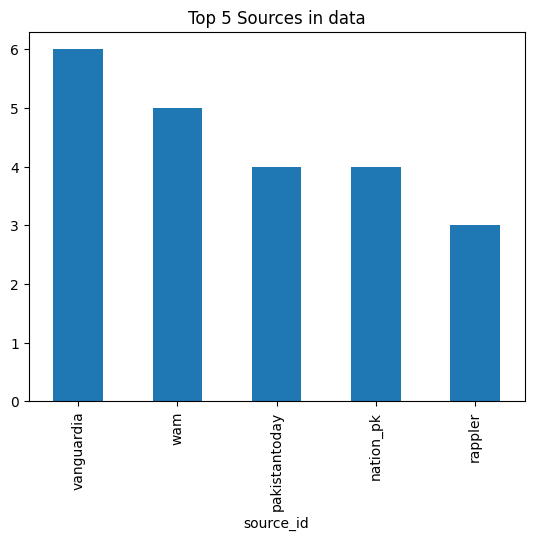

In [31]:
(master_unique
 .value_counts("source_id")
 .nlargest(5)
 .plot(kind  = "bar",
       title = "Top 5 Sources in data"))

<Axes: title={'center': 'Top 5 Languages in data'}, xlabel='language'>

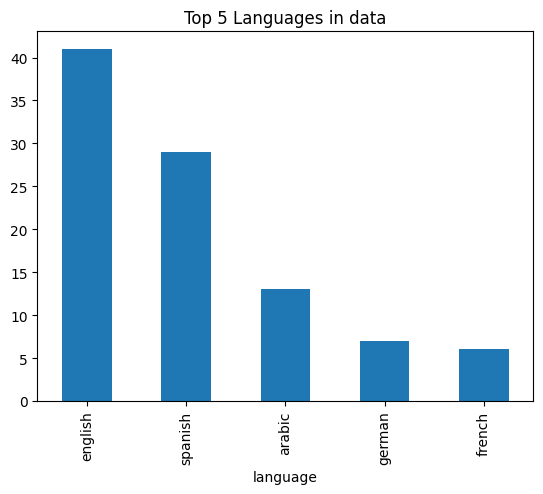

In [29]:
(master_unique
 .value_counts("language")
 .nlargest(5)
 .plot(kind  = "bar",
       title = "Top 5 Languages in data"))